In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
chess_df = pd.read_csv("games.csv")

In [3]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [4]:
chess_df['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [5]:
import math

skill_difference = chess_df.loc[abs(chess_df['white_rating'] - chess_df['black_rating']) > 0]
skill_difference.count()

id                19855
rated             19855
created_at        19855
last_move_at      19855
turns             19855
victory_status    19855
winner            19855
increment_code    19855
white_id          19855
white_rating      19855
black_id          19855
black_rating      19855
moves             19855
opening_eco       19855
opening_name      19855
opening_ply       19855
dtype: int64

In [6]:
outsiders = skill_difference.loc[(
    (skill_difference['white_rating'] > skill_difference['black_rating']) & (skill_difference['winner'] == 'black')
    |
    (skill_difference['white_rating'] < skill_difference['black_rating']) & (skill_difference['winner'] == 'white')
)]
outsiders

id  rated    created_at  last_move_at  turns victory_status  \
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
8      dwF3DJHO   True  1.503510e+12  1.503510e+12     66         resign   
14     u7i6dOaJ  False  1.504090e+12  1.504100e+12     31           mate   
...         ...    ...           ...           ...    ...            ...   
20047  X0DJ1fJu   True  1.499870e+12  1.499871e+12     73           mate   
20051  uMzb0TPC   True  1.499812e+12  1.499813e+12     58           mate   
20052  EopEqqAa   True  1.499812e+12  1.499812e+12     37         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   

      winner increment_code           white_id  white_rating  \
1      black           5+10               a-00          1322   
2      white           5+10             ischia          1496   
3      white           20+0      daniamurashov          1439   
8      black           15+0          ehabfanri          1439   
14     white          15+15  shivangithegenius          1094   
...      ...            ...                ...           ...   
20047  white          10+10           jamboger          1222   
20051  black          10+10           samael88          1237   
20052  white          10+10           jamboger          1219   
20054  black           10+0           jamboger          1233   
20055  white           10+0           jamboger          1219   

                 black_id  black_rating  \
1               skinnerua          1261   
2                    a-00          1500   
3            adivanov2009          1454   
8      daniel_likes_chess          1392   
14          sureka_akshat          1141   
...                   ...           ...   
20047       mateuslichess          1262   
20051            jamboger          1231   
20052            samael88          1250   
20054  farrukhasomiddinov          1196   
20055        schaaksmurf3          1286   

                                                   moves opening_eco  \
1      d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...         B00   
2      e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...         C20   
3      d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...         D02   
8      e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...         C50   
14     e4 e5 Nf3 Nc6 Bc4 Nf6 Nc3 Bc5 O-O O-O d3 Ne8 B...         C50   
...                                                  ...         ...   
20047  c4 d5 e3 dxc4 Bxc4 Nc6 a3 Ne5 d4 Nxc4 Nc3 e5 N...         A10   
20051  e4 e6 Nf3 d5 Bb5+ Bd7 c4 c6 Ba4 Qa5 b3 b5 cxb5...         C00   
20052  c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...         A40   
20054  d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...         A41   
20055  d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...         D00   

                                      opening_name  opening_ply  
1           Nimzowitsch Defense: Kennedy Variation            4  
2            King's Pawn Game: Leonardis Variation            3  
3           Queen's Pawn Game: Zukertort Variation            3  
8            Italian Game: Schilling-Kostic Gambit            6  
14            Four Knights Game: Italian Variation            8  
...                                            ...          ...  
20047  English Opening: Anglo-Scandinavian Defense            2  
20051             French Defense: Knight Variation            3  
20052                              English Defense            4  
20054                                 Queen's Pawn            2  
20055              Queen's Pawn Game: Mason Attack            3  

[6566 rows x 16 columns]

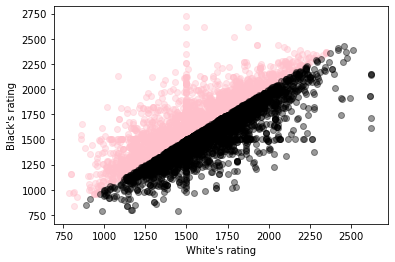

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=outsiders['white_rating'].loc[outsiders['winner'] == 'white'], y=outsiders['black_rating'].loc[outsiders['winner'] == 'white'], c='pink', alpha=0.4)
plt.scatter(x=outsiders['white_rating'].loc[outsiders['winner'] == 'black'], y=outsiders['black_rating'].loc[outsiders['winner'] == 'black'], c='black', alpha=0.4)
plt.xlabel('White\'s rating')
plt.ylabel('Black\'s rating')
plt.show()

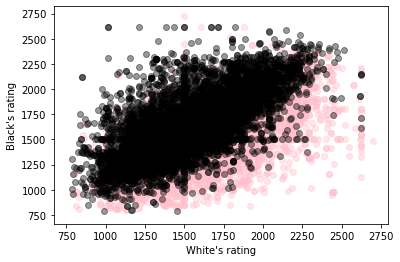

In [8]:
plt.scatter(x=chess_df['white_rating'].loc[chess_df['winner'] == 'white'], y=chess_df['black_rating'].loc[chess_df['winner'] == 'white'], c='pink', alpha=0.4)
plt.scatter(x=chess_df['white_rating'].loc[chess_df['winner'] == 'black'], y=chess_df['black_rating'].loc[chess_df['winner'] == 'black'], c='black', alpha=0.4)
plt.xlabel('White\'s rating')
plt.ylabel('Black\'s rating')
plt.show()

In [9]:
quick_mate = chess_df.loc[(chess_df['victory_status'] == 'mate') & (chess_df['turns'] < 15)]
qm_copy = quick_mate.copy()

qm_copy['average_rating'] = abs(qm_copy['white_rating'] + qm_copy['black_rating']) / 2.0
qm_copy.sort_values(by=['average_rating'], ascending=False)

id  rated    created_at  last_move_at  turns victory_status  \
2215   sLupLGpo  False  1.490330e+12  1.490330e+12     14           mate   
2230   YGp2YjQd  False  1.486550e+12  1.486550e+12     13           mate   
17525  psxki3ya   True  1.479028e+12  1.479028e+12      9           mate   
18145  ogyEjDbp   True  1.479848e+12  1.479848e+12     14           mate   
17360  wNJGpLQ5   True  1.490831e+12  1.490831e+12     13           mate   
...         ...    ...           ...           ...    ...            ...   
2915   agxGtAax   True  1.485900e+12  1.485900e+12      7           mate   
11150  ex2qp159   True  1.388586e+12  1.388586e+12      8           mate   
10615  l8c3NsKI   True  1.394726e+12  1.394726e+12      7           mate   
10837  Y2rYfyV2  False  1.415913e+12  1.415915e+12     10           mate   
14864  urWm3H5j   True  1.495106e+12  1.495106e+12     14           mate   

      winner increment_code         white_id  white_rating       black_id  \
2215   black           10+0          ericksn          1778     doraemon61   
2230   white           10+0       doraemon61          2264  hisokaxhunter   
17525  white            8+0          kemchik          1932      tunisinov   
18145  black           10+0      carachecity          1653     fabian1104   
17360  white           10+0  mikhail_riemann          1757   evgenromanov   
...      ...            ...              ...           ...            ...   
2915   white           15+0    businessman47          1131         apl020   
11150  black           25+0          mohsenh           969      andreas00   
10615  white          4+180            denry          1129  austindecoder   
10837  black           16+0          beastly           869      micaiahwa   
14864  black          15+15           marigw           913  reydelmambo13   

       black_rating                                              moves  \
2215           2264  e4 d5 exd5 Nf6 Nc3 Nxd5 Nge2 Nc6 g3 Bg4 h3 Nd4...   
2230           1753  e4 e5 Nc3 c6 d4 exd4 Qxd4 c5 Qe5+ Ne7 Nb5 f6 Nd6#   
17525          1989               d4 f5 Bg5 Nf6 Bxf6 gxf6 e4 fxe4 Qh5#   
18145          2079  e4 e5 Nf3 Nf6 Bc4 Nxe4 Nxe5 d5 Bb3 Qg5 Nf3 Qxg...   
17360          1874   e4 c6 d4 d6 Bg5 Nd7 Nf3 f6 Bh4 g5 Nxg5 fxg5 Qh5#   
...             ...                                                ...   
2915           1071                          e4 c6 Bc4 e5 Qf3 b5 Qxf7#   
11150          1195                     e4 e6 Nc3 Qh4 d3 Bc5 Nf3 Qxf2#   
10615           954                        e4 a6 Qh5 Ra7 Bc4 Nf6 Qxf7#   
10837          1028             b4 e5 Na3 Nf6 Bb2 Ne4 Rb1 Qh4 e3 Qxf2#   
14864           981   d4 Nf6 c3 e6 a4 Ng4 h3 Nf6 g4 g5 f3 Bd6 Nd2 Bg3#   

      opening_eco                               opening_name  opening_ply  \
2215          B01  Scandinavian Defense: Modern Variation #2            4   
2230          C27                                Vienna Game            3   
17525         A80               Dutch Defense: Hopton Attack            3   
18145         C42                Russian Game: Urusov Gambit            5   
17360         B12                          Caro-Kann Defense            3   
...           ...                                        ...          ...   
2915          C23   Bishop's Opening: Philidor Counterattack            4   
11150         C00             French Defense: Queen's Knight            3   
10615         B00                         St. George Defense            2   
10837         A00                             Polish Opening            1   
14864         A45                                Indian Game            2   

       average_rating  
2215           2021.0  
2230           2008.5  
17525          1960.5  
18145          1866.0  
17360          1815.5  
...               ...  
2915           1101.0  
11150          1082.0  
10615          1041.5  
10837           948.5  
14864           947.0  

[140 rows x 17 columns]

In [10]:
quick_mate_moves = qm_copy['moves'].tolist()
for moveset in quick_mate_moves:
    moveset = moveset.split(' ')


In [30]:
def get_last_move(winner=None):
    mates = chess_df.loc[chess_df['victory_status'] == 'mate']
    if(winner != None):
        mates = mates.loc[mates['winner'] == winner]
    mates_all_moves = mates['moves']
    mates_last_move = []
    for mate in mates_all_moves:
        mate = mate.split(' ')
        mates_last_move.append(mate[len(mate) - 1])
    return mates_last_move

def clean_moves_of_pieces(mates_last_move):
    mates_clean = []
    for i in range(len(mates_last_move)):
        mates_clean.append('')
        mates_clean[i] = mates_last_move[i].replace('Q', '') # Deleting Queen notation
        mates_clean[i] = mates_clean[i].replace('R', '') # Deleting Rook notation
        mates_clean[i] = mates_clean[i].replace('B', '') # Deleting Bishop notation
        mates_clean[i] = mates_clean[i].replace('N', '') # Deleting Knight notation
        mates_clean[i] = mates_clean[i].replace('x', '') # Deleting capture notation
        mates_clean[i] = mates_clean[i].replace('#', '') # Deleting mate notation
        mates_clean[i] = mates_clean[i].replace('=', '') # Deleting promotion notation

    for i in range(len(mates_clean)):
        mate = list(mates_clean[i])
        if len(mate) > 2:
            mate[0] = ''
        mates_clean[i] = "".join(mate)
    
    return mates_clean

def turn_into_number_notation(mates_clean):
    number_notation = []
    for mate in mates_clean:
        lmate = list(mate)
        number_notation.append([ord(lmate[0]) - 96, int(lmate[1])])
    return number_notation
        
def full_mate_transformation(winner=None):
    mates_last_move = get_last_move(winner)
    mates_clean = clean_moves_of_pieces(mates_last_move)
    print(mates_clean)
    number_notation = turn_into_number_notation(mates_clean)
    
    return np.array(number_notation)

mates_in_number_notation = full_mate_transformation()

['d1', 'g7', 'h7', 'g7', 'e8', 'g7', 'h2', 'h7', 'b8', 'f1', 'f2', 'e7', 'c7', 'h4', 'h2', 'f1', 'h6', 'f2', 'a1', 'f8', 'g4', 'h1', 'd3', 'e8', 'e8', 'a5', 'f2', 'b5', 'g6', 'd5', 'h7', 'e1', 'b1', 'e1', 'g2', 'c8', 'f3', 'c5', 'h1', 'g8', 'a4', 'h7', 'f4', 'a2', 'g8', 'e3', 'g7', 'd8', 'a1', 'g3', 'e8', 'g7', 'g5', 'f2', 'g7', 'a1', 'h3', 'e8', 'f4', 'f7', 'g6', 'b3', 'g1', 'h1', 'g2', 'f1', 'f2', 'c8', 'b7', 'a4', 'a8', 'e8', 'c2', 'b5', 'd3', 'b4', 'f1', 'd8', 'c7', 'c2', 'h7', 'g2', 'g2', 'd8', 'b3', 'g6', 'f7', 'd4', 'g5', 'f2', 'c1', 'f7', 'd6', 'g1', 'h3', 'f8', 'b2', 'f1', 'b7', 'h2', 'e1', 'f2', 'g7', 'a5', 'f3', 'b3', 'f8', 'h3', 'g8', 'g7', 'h1', 'f7', 'b7', 'e8', 'd2', 'e1', 'g7', 'd2', 'f7', 'g7', 'b6', 'g8', 'b3', 'f8', 'h8', 'c8', 'g7', 'g7', 'e1', 'g2', 'h2', 'h7', 'h2', 'f2', 'a3', 'b7', 'f1', 'g2', 'h5', 'f7', 'f8', 'g1', 'g2', 'f2', 'd1', 'h7', 'c1', 'g7', 'g7', 'd7', 'd1', 'f7', 'c7', 'h1', 'e1', 'd8', 'g3', 'f7', 'g6', 'd4', 'g7', 'd8', 'b4', 'g7', 'b2', 'f1', 'd8

In [31]:
def turn_into_board_of_values(mates):
    (unique, counts) = np.unique(mates, axis=0, return_counts=True)
    counts = counts.reshape(8, 8).T
    counts = np.flip(counts, axis=0)
    percentages = counts / counts.sum() * 100
    percentages = np.round(percentages, 2)
    
    return counts, percentages

mates_count, mates_percentages = turn_into_board_of_values(mates_in_number_notation)
mates_count, mates_percentages

(array([[124,  49, 107, 189, 207, 186,  95, 186],
        [ 41,  78,  88,  94, 112, 367, 324, 240],
        [ 34,  41,  34,  50,  51,  61,  88,  81],
        [ 36,  36,  32,  49,  40,  49,  78,  66],
        [ 35,  41,  24,  32,  42,  53, 108,  71],
        [ 29,  37,  30,  48,  50,  72,  79,  94],
        [ 42,  75,  66,  71,  98, 239, 324, 187],
        [112,  72,  85, 176, 206, 146, 103, 165]]),
 array([[1.96, 0.77, 1.69, 2.99, 3.27, 2.94, 1.5 , 2.94],
        [0.65, 1.23, 1.39, 1.49, 1.77, 5.8 , 5.12, 3.79],
        [0.54, 0.65, 0.54, 0.79, 0.81, 0.96, 1.39, 1.28],
        [0.57, 0.57, 0.51, 0.77, 0.63, 0.77, 1.23, 1.04],
        [0.55, 0.65, 0.38, 0.51, 0.66, 0.84, 1.71, 1.12],
        [0.46, 0.58, 0.47, 0.76, 0.79, 1.14, 1.25, 1.49],
        [0.66, 1.19, 1.04, 1.12, 1.55, 3.78, 5.12, 2.96],
        [1.77, 1.14, 1.34, 2.78, 3.26, 2.31, 1.63, 2.61]]))

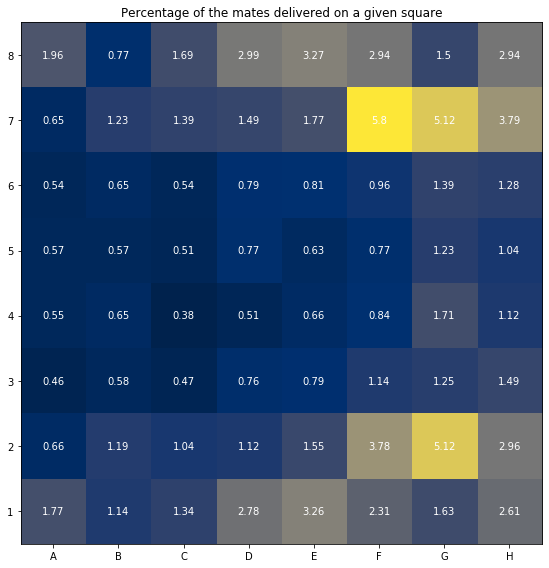

In [32]:
# Visualization, finally
import matplotlib


horizontal = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
vertical = ['1', '2', '3', '4', '5', '6', '7', '8']

vertical.reverse()

# cmaps['Sequential'] = [
#             'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#             'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#             'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
im = ax.imshow(mates_percentages, cmap='cividis')

ax.set_xticks(np.arange(len(horizontal)))
ax.set_yticks(np.arange(len(vertical)))

ax.set_xticklabels(horizontal)
ax.set_yticklabels(vertical)

for i in range(len(vertical)):
    for j in range(len(horizontal)):
        text = ax.text(j, i, mates_percentages[i,j], ha='center', va='center', color='w')
        
ax.set_title('Percentage of the mates delivered on a given square')
fig.tight_layout()

plt.show()